In [1]:
import xarray as xr
from glob import glob
import yaml
import os

import plotting

try:
    from ecco_pipeline.conf.global_settings import OUTPUT_DIR
    import ecco_pipeline.transformation.Transformation as Transformation
except:
    os.chdir(os.path.realpath(os.path.join(os.path.abspath(''), '../../..')))
    from ecco_pipeline.conf.global_settings import OUTPUT_DIR
    import ecco_pipeline.transformation.Transformation as Transformation

In [2]:
ds_name = "GRC-GFO_GRIDDED_AOD1B_JPL_MASCON_RL06"
hemisphere = ''
with open(f'conf/ds_configs/{ds_name}.yaml', 'r') as stream:
    config = yaml.load(stream, yaml.Loader)

# Load sample granule

In [3]:
ds_granules_dir = f'{OUTPUT_DIR}/{ds_name}/harvested_granules/'
ds_granules = glob(f'{ds_granules_dir}/**/*.nc')
if hemisphere:
    ds_granules = [g for g in ds_granules if hemisphere in g]
sample_granule_path = ds_granules[0]
print(sample_granule_path)
ds = xr.open_dataset(sample_granule_path)
ds

/Users/marlis/Developer/ECCO/ecco_output/GRC-GFO_GRIDDED_AOD1B_JPL_MASCON_RL06/harvested_granules/2002/GRD-3_2002122-2002138_AOD1B_JPL_180_msc.nc


<xarray.Dataset>
Dimensions:          (lon: 720, lat: 360, time: 1, bounds: 2)
Coordinates:
  * lon              (lon) float64 0.25 0.75 1.25 1.75 ... 358.8 359.2 359.8
  * lat              (lat) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * time             (time) datetime64[ns] 2002-05-10T12:00:00
Dimensions without coordinates: bounds
Data variables:
    lat_bounds       (lat, bounds) float64 ...
    lon_bounds       (lon, bounds) float64 ...
    time_bounds      (time, bounds) datetime64[ns] ...
    GAA_msc_Lmax180  (time, lat, lon) float64 ...
    GAB_msc_Lmax180  (time, lat, lon) float64 ...
    GAC_msc_Lmax180  (time, lat, lon) float64 ...
    GAD_msc_Lmax180  (time, lat, lon) float64 ...
Attributes: (12/43)
    conventions:                CF-1.6,ACDD-1.3,ISO 8601
    metadata_Conventions:       Unidata Dataset Discovery v1.0
    standard_name_vocabulary:   CF-1.6
    geospatial_lat_min:         -89.75
    geospatial_lat_max:         89.75
    geospatial_lat_units:       degrees_north
    ...                         ...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    institution:                NASA/JPL
    naming_authority:           org.doi.dx
    time_coverage_start:        2002-05-02T00:00:00
    time_coverage_end:          2002-05-19T00:00:00
    unused_days:                08-May-2002 , 14-May-2002

# Load grid

In [4]:
grids = glob(f'grids/*.nc*')
grids.sort()
f'Available grids: {grids}'

"Available grids: ['grids/ECCO_llc270.nc', 'grids/ECCO_llc90.nc', 'grids/grid_tpose6_radius.nc', 'grids/polar_stereo_n_25km.nc']"

In [5]:
grid_ds = xr.open_dataset(grids[1])
grid_ds

<xarray.Dataset>
Dimensions:                (tile: 13, j: 90, i: 90)
Coordinates:
  * tile                   (tile) int16 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j                      (j) int16 0 1 2 3 4 5 6 7 ... 82 83 84 85 86 87 88 89
  * i                      (i) int16 0 1 2 3 4 5 6 7 ... 82 83 84 85 86 87 88 89
Data variables:
    XC                     (tile, j, i) float32 ...
    YC                     (tile, j, i) float32 ...
    effective_grid_radius  (tile, j, i) float32 ...
Attributes:
    name:                  ECCO_llc90
    type:                  llc
    geospatial_lat_min:    -89.873055
    geospatial_lat_max:    89.739395
    geospatial_lon_min:    -179.98895
    geospatial_lon_max:    179.98691
    geospatial_lat_units:  degrees_north
    geospatial_lon_units:  degrees_east

In [6]:
T = Transformation.Transformation(config, sample_granule_path)

# Make mapping factors

In [7]:
factors = T.make_factors(grid_ds)

/Users/marlis/opt/anaconda3/envs/ecco_pipeline/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


Only using 100 nearest neighbours, but you may need up to 2023468639237340970365851722055680


/Users/marlis/opt/anaconda3/envs/ecco_pipeline/lib/python3.10/site-packages/pyresample/kd_tree.py:384: UserWarning: Possible more than 100 neighbours within 77123 m for some data points
  warnings.warn(('Possible more than %s neighbours '


0 %
5 %
10 %
15 %
21 %
26 %
31 %
36 %
42 %
47 %
52 %
57 %
63 %
68 %
73 %
78 %
84 %
89 %
94 %


# Transformation

In [8]:
field_ds_list = T.transform(grid_ds, factors, ds, config)

In [9]:
field_ds = field_ds_list[0][0]
field_ds

<xarray.Dataset>
Dimensions:                                     (time: 1, tile: 13, j: 90,
                                                 i: 90, nv: 2)
Coordinates:
  * time                                        (time) datetime64[ns] 2002-05...
  * tile                                        (tile) int16 0 1 2 ... 10 11 12
  * j                                           (j) int16 0 1 2 3 ... 87 88 89
  * i                                           (i) int16 0 1 2 3 ... 87 88 89
    XC                                          (tile, j, i) float32 -111.6 ....
    YC                                          (tile, j, i) float32 -88.24 ....
    time_bnds                                   (time, nv) datetime64[ns] 200...
Dimensions without coordinates: nv
Data variables:
    GAB_msc_Lmax180_interpolated_to_ECCO_llc90  (time, tile, j, i) float64 3....
Attributes:
    interpolated_grid:            ECCO_llc90
    model_grid_type:              llc
    original_dataset_title:       JPL GRACE/GRACE-FO Gridded-AOD1B Water-Equi...
    original_dataset_short_name:  GRC-GFO_GRIDDED_AOD1B_JPL_MASCON_RL06
    original_dataset_url:         https://podaac.jpl.nasa.gov/dataset/GRC-GFO...
    original_dataset_reference:   https://doi.org/10.5067/GGAOD-3MJ60
    original_dataset_doi:         10.5067/GGAOD-3MJ60
    interpolated_grid_id:         ECCO_llc90
    transformation_version:       2.0
    notes:

# Visualization

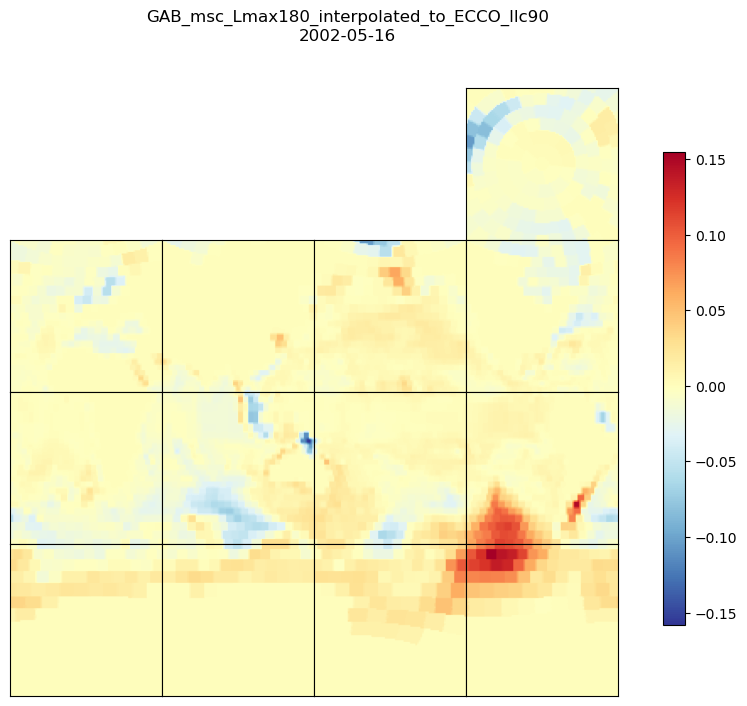

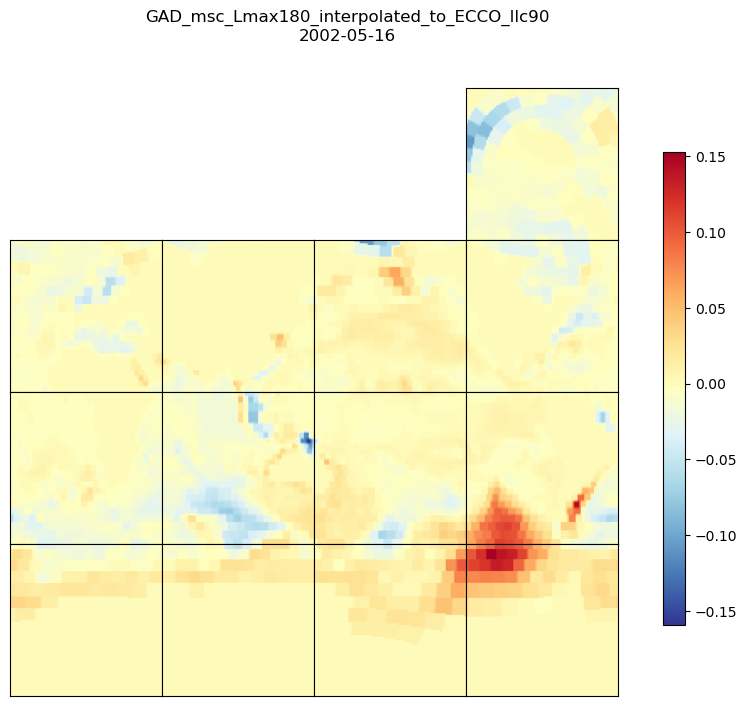

In [13]:
for field_ds in field_ds_list:
    plotting.make_plot(field_ds[0][list(field_ds[0].data_vars)[0]])
